# Natural Language Processing

### Understanding TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF is a statistical measure used in Natural Language Processing (NLP) to determine the importance of a word (term) in a document relative to a collection of documents (corpus). It helps identify words that are important for distinguishing one document from others.

#### Formula:
The TF-IDF score for a term \(x\) in a document \(y\) is calculated as:

\[
W_{x,y} = TF_{x,y} \cdot \log\left(\frac{N}{DF_x}\right)
\]

Where:
- \(W_{x,y}\): TF-IDF score of term \(x\) in document \(y\)
- \(TF_{x,y}\): **Term Frequency** — how often the term \(x\) appears in document \(y\)
- \(N\): Total number of documents in the corpus
- \(DF_x\): **Document Frequency** — the number of documents containing the term \(x\)

---

#### Components:
1. **Term Frequency (TF):**
   Measures the frequency of the term in the document:
   \[
   TF_{x,y} = \frac{\text{Frequency of } x \text{ in } y}{\text{Total terms in document } y}
   \]

2. **Inverse Document Frequency (IDF):**
   Penalizes common terms that appear across many documents. Rarer terms are given higher weight:
   \[
   IDF_x = \log\left(\frac{N}{DF_x}\right)
   \]

---

#### Why This Formula Works:
1. **TF measures local importance**:
   Words that occur frequently in a document are likely important for that specific document.

2. **IDF measures global importance**:
   Common words (e.g., "the", "is", "and") appear in many documents and are less useful for distinguishing between them. IDF reduces their importance.

3. **Combining TF and IDF**:
   Multiplying \(TF\) and \(IDF\) ensures that a word is considered important only if it is frequent in a specific document and rare across the entire corpus.

---

#### Intuitive Example:
Consider two words in a corpus of movie reviews: **"great"** and **"movie"**.
- "great" appears frequently in a few specific reviews → **high TF, high IDF → important**.
- "movie" appears in almost all reviews → **high TF, low IDF → less important**.

TF-IDF ensures that "great" is assigned a higher weight because it is unique to certain documents, while "movie" gets a lower weight because it is common to all documents.

---

TF-IDF is widely used in:
- Keyword extraction
- Text classification
- Document similarity
- Information retrieval


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.pyplot inline

In [5]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  l



Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.............. Chat-80 Data Files
  [ ] city_database....... City

Hit Enter to continue:  


  [ ] comtrans............ ComTrans Corpus Sample
  [ ] conll2000........... CONLL 2000 Chunking Corpus
  [ ] conll2002........... CONLL 2002 Named Entity Recognition Corpus
  [ ] conll2007........... Dependency Treebanks from CoNLL 2007 (Catalan
                           and Basque Subset)
  [ ] crubadan............ Crubadan Corpus
  [ ] dependency_treebank. Dependency Parsed Treebank
  [ ] dolch............... Dolch Word List
  [ ] europarl_raw........ Sample European Parliament Proceedings Parallel
                           Corpus
  [ ] extended_omw........ Extended Open Multilingual WordNet
  [ ] floresta............ Portuguese Treebank
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] gazetteers.......... Gazeteer Lists
  [ ] genesis............. Genesis Corpus
  [ ] gutenberg........... Project Gutenberg Selections
  [ ] ieer................ NIST IE-ER DATA SAMPLE
  [ ] inaugural........... C-Span Inaugural Address Corpus
  [ ] indian........

Hit Enter to continue:  


  [ ] kimmo............... PC-KIMMO Data Files
  [ ] knbc................ KNB Corpus (Annotated blog corpus)
  [ ] large_grammars...... Large context-free and feature-based grammars
                           for parser comparison
  [ ] lin_thesaurus....... Lin's Dependency Thesaurus
  [ ] mac_morpho.......... MAC-MORPHO: Brazilian Portuguese news text with
                           part-of-speech tags
  [ ] machado............. Machado de Assis -- Obra Completa
  [ ] masc_tagged......... MASC Tagged Corpus
  [ ] maxent_ne_chunker... ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_ne_chunker_tab ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_treebank_pos_tagger Treebank Part of Speech Tagger (Maximum entropy)
  [ ] maxent_treebank_pos_tagger_tab Treebank Part of Speech Tagger (Maximum entropy)
  [ ] moses_sample........ Moses Sample Models
  [ ] movie_reviews....... Sentiment Polarity Dataset Version 2.0
  [ ] mte_teip5........... MULTEXT-East 1984 annotated corpus 4.

Hit Enter to continue:  


  [ ] nps_chat............ NPS Chat
  [ ] omw-1.4............. Open Multilingual Wordnet
  [ ] omw................. Open Multilingual Wordnet
  [ ] opinion_lexicon..... Opinion Lexicon
  [ ] panlex_swadesh...... PanLex Swadesh Corpora
  [ ] paradigms........... Paradigm Corpus
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task
  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [ ] pil................. The Patient Information Leaflet (PIL) Corpus
  [ ] pl196x.............. Polish language of the XX century sixties
  [ ] porter_test......... Porter Stemmer Test Files
  [ ] ppattach............ Prepositional Phrase Attachment Corpus
  [ ] problem_reports..... Problem Report Corpus
  [ ] product_reviews_1... Product Reviews (5 Products)
  [ ] product_reviews_2... Product Reviews (9 Products)
  [ ] propbank............ Proposition Bank Corpus 1.0
 

Hit Enter to continue:  


  [ ] punkt_tab........... Punkt Tokenizer Models
  [ ] qc.................. Experimental Data for Question Classification
  [ ] reuters............. The Reuters-21578 benchmark corpus, ApteMod
                           version
  [ ] rslp................ RSLP Stemmer (Removedor de Sufixos da Lingua
                           Portuguesa)
  [ ] rte................. PASCAL RTE Challenges 1, 2, and 3
  [ ] sample_grammars..... Sample Grammars
  [ ] semcor.............. SemCor 3.0
  [ ] senseval............ SENSEVAL 2 Corpus: Sense Tagged Text
  [ ] sentence_polarity... Sentence Polarity Dataset v1.0
  [ ] sentiwordnet........ SentiWordNet
  [ ] shakespeare......... Shakespeare XML Corpus Sample
  [ ] sinica_treebank..... Sinica Treebank Corpus Sample
  [ ] smultron............ SMULTRON Corpus Sample
  [ ] snowball_data....... Snowball Data
  [ ] spanish_grammars.... Grammars for Spanish
  [ ] state_union......... C-Span State of the Union Address Corpus
  [ ] stopwords........... Stopword

Hit Enter to continue:  


  [ ] switchboard......... Switchboard Corpus Sample
  [ ] tagsets............. Help on Tagsets
  [ ] tagsets_json........ Help on Tagsets (JSON)
  [ ] timit............... TIMIT Corpus Sample
  [ ] toolbox............. Toolbox Sample Files
  [ ] treebank............ Penn Treebank Sample
  [ ] twitter_samples..... Twitter Samples
  [ ] udhr2............... Universal Declaration of Human Rights Corpus
                           (Unicode Version)
  [ ] udhr................ Universal Declaration of Human Rights Corpus
  [ ] unicode_samples..... Unicode Samples
  [ ] universal_tagset.... Mappings to the Universal Part-of-Speech Tagset
  [ ] universal_treebanks_v20 Universal Treebanks Version 2.0
  [ ] vader_lexicon....... VADER Sentiment Lexicon
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [ ] verbnet............. VerbNet Lexicon, Version 2.1
  [ ] webtext............. Web Text Corpus
  [ ] wmt15_eval.......... Evaluation data from WMT15
  [ ] word2vec_sample..... Word2Vec Sam

Hit Enter to continue:  


  [ ] wordnet31........... Wordnet 3.1
  [ ] wordnet............. WordNet
  [ ] wordnet_ic.......... WordNet-InfoContent
  [ ] words............... Word Lists
  [ ] ycoe................ York-Toronto-Helsinki Parsed Corpus of Old
                           English Prose

Collections:
  [ ] all-corpora......... All the corpora
  [ ] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [ ] all................. All packages
  [ ] book................ Everything used in the NLTK Book
  [ ] popular............. Popular packages
  [ ] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages)

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [14]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [40]:
i=1
print(f"Message {i}: {messages[i]}")

print(f"Message {i} len: {len(messages[i])}")

Message 1: ham	Ok lar... Joking wif u oni...
Message 1 len: 33


In [46]:
# First 10 messages
for i in range(10):
    print(f" {i+1} : {messages[i]}")

 1 : ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
 2 : ham	Ok lar... Joking wif u oni...
 3 : spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
 4 : ham	U dun say so early hor... U c already then say...
 5 : ham	Nah I don't think he goes to usf, he lives around here though
 6 : spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
 7 : ham	Even my brother is not like to speak with me. They treat me like aids patent.
 8 : ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
 9 : spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. 

In [50]:
for msg_no,message, in enumerate(messages[:10]):
    print(msg_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [52]:
df=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [54]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [66]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [68]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

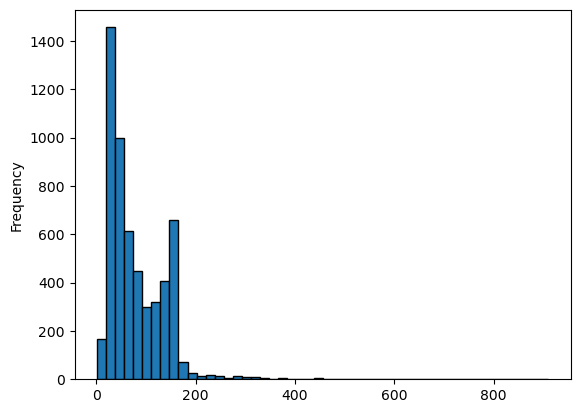

In [99]:
df['length'].plot.hist(bins=50,edgecolor='black')

In [101]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [103]:
df[df['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
